In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [138]:
bolsa_familia = pd.read_csv("../bolsa_familia/bolsa_familia.csv")
bolsa_familia = bolsa_familia[bolsa_familia['regiao'].str.startswith(('TOTAL BRASIL'), na=False)]
bolsa_familia['perc_excesso_peso'] = round((bolsa_familia['perc_sobrepeso'] + bolsa_familia['perc_obesidade'] + bolsa_familia['perc_obesidade_grave']) * 100,0)
bolsa_familia = bolsa_familia[['perc_excesso_peso', 'ano']]

sisvan_web = pd.read_csv("../sisvan-web/sisvan_web.csv")
sisvan_web = sisvan_web[sisvan_web['regiao'].str.startswith(('TOTAL BRASIL'), na=False)]
sisvan_web['perc_excesso_peso'] = round((sisvan_web['perc_sobrepeso'] + sisvan_web['perc_obesidade'] + sisvan_web['perc_obesidade_grave'])*100,0)
sisvan_web = sisvan_web[['perc_excesso_peso', 'ano']]

e_sus = pd.read_csv("../e-sus/e_sus.csv")
e_sus = e_sus[e_sus['regiao'].str.startswith(('TOTAL BRASIL'), na=False)]
e_sus['perc_excesso_peso'] = round((e_sus['perc_sobrepeso'] + e_sus['perc_obesidade'] + e_sus['perc_obesidade_grave']) * 100,0)
e_sus = e_sus[['perc_excesso_peso', 'ano']]

/var/folders/gy/cxx2_pv95ys52g0qvnjgcsqm0000gn/T/ipykernel_27061/406958338.py:11: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  e_sus = pd.read_csv("../e-sus/e_sus.csv")


In [139]:
bolsa_familia = bolsa_familia.dropna(subset=['perc_excesso_peso'])
sisvan_web = sisvan_web.dropna(subset=['perc_excesso_peso'])
e_sus = e_sus.dropna(subset=['perc_excesso_peso'])

In [140]:
def regressao_linear(dados):
    anos = dados['ano'].astype(float)
    percentual = dados['perc_excesso_peso']

    X = sm.add_constant(anos)  
    modelo = sm.OLS(percentual, X).fit()  
    return modelo

modelo_bolsa_familia = regressao_linear(bolsa_familia)
modelo_sisvan_web = regressao_linear(sisvan_web)
modelo_e_sus = regressao_linear(e_sus)

print('Regressão Linear - Bolsa Família')
print(modelo_bolsa_familia.summary())

print('\nRegressão Linear - SISVAN-WEB')
print(modelo_sisvan_web.summary())


print('\nRegressão Linear - E-SUS')
print(modelo_e_sus.summary())


Regressão Linear - Bolsa Família
                            OLS Regression Results                            
Dep. Variable:      perc_excesso_peso   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     76.53
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.08e-05
Time:                        14:59:06   Log-Likelihood:                -12.140
No. Observations:                  11   AIC:                             28.28
Df Residuals:                       9   BIC:                             29.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1332.05

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


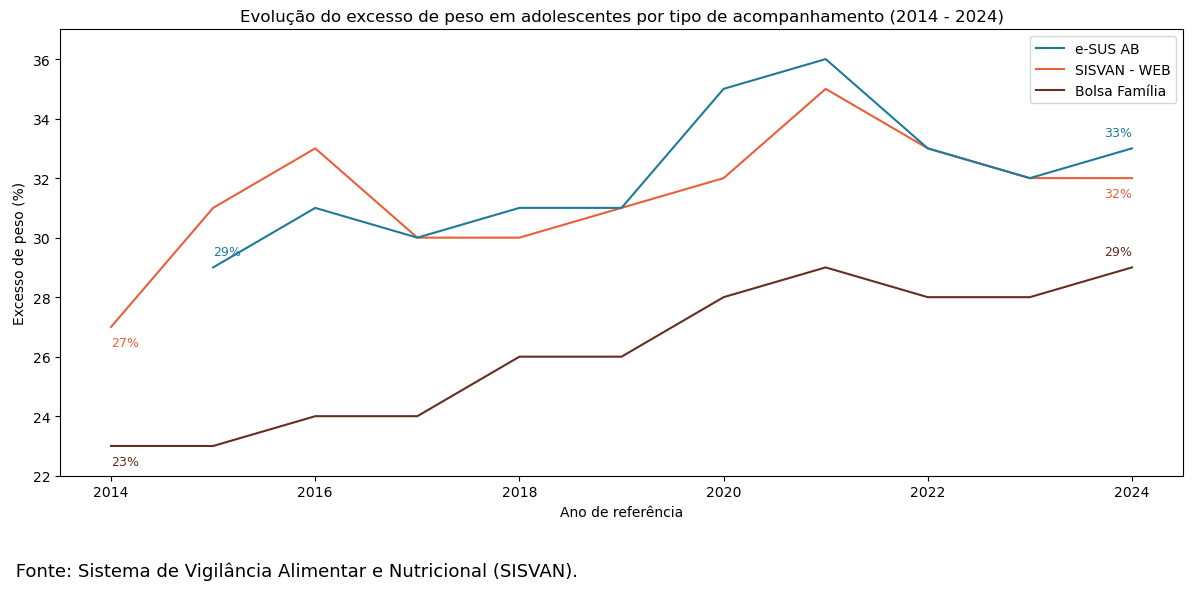

In [147]:
plt.figure(figsize=(12, 6))

linha_bf, = plt.plot(bolsa_familia['ano'], bolsa_familia['perc_excesso_peso'], label='Bolsa Família', color='#632F21')
linha_sw, = plt.plot(sisvan_web['ano'], sisvan_web['perc_excesso_peso'], label='SISVAN - WEB', color='#E95F3A')
linha_es, = plt.plot(e_sus['ano'], e_sus['perc_excesso_peso'], label='e-SUS AB', color='#1F7A99')

plt.text(bolsa_familia['ano'].iloc[0], bolsa_familia['perc_excesso_peso'].iloc[0] - 0.3, 
         f"{bolsa_familia['perc_excesso_peso'].iloc[0]:.0f}%", 
         color='#632F21', fontsize=9, va='top', ha='left')
plt.text(bolsa_familia['ano'].iloc[-1], bolsa_familia['perc_excesso_peso'].iloc[-1] + 0.3, 
         f"{bolsa_familia['perc_excesso_peso'].iloc[-1]:.0f}%", 
         color='#632F21', fontsize=9, va='bottom', ha='right')

plt.text(sisvan_web['ano'].iloc[0], sisvan_web['perc_excesso_peso'].iloc[0] - 0.3, 
         f"{sisvan_web['perc_excesso_peso'].iloc[0]:.0f}%", 
         color='#E95F3A', fontsize=9, va='top', ha='left')
plt.text(sisvan_web['ano'].iloc[-1], sisvan_web['perc_excesso_peso'].iloc[-1] - 0.3, 
         f"{sisvan_web['perc_excesso_peso'].iloc[-1]:.0f}%", 
         color='#E95F3A', fontsize=9, va='top', ha='right')

plt.text(e_sus['ano'].iloc[0], e_sus['perc_excesso_peso'].iloc[0] + 0.3, 
         f"{e_sus['perc_excesso_peso'].iloc[0]:.0f}%", 
         color='#1F7A99', fontsize=9, va='bottom', ha='left')
plt.text(e_sus['ano'].iloc[-1], e_sus['perc_excesso_peso'].iloc[-1] + 0.3, 
         f"{e_sus['perc_excesso_peso'].iloc[-1]:.0f}%", 
         color='#1F7A99', fontsize=9, va='bottom', ha='right')

todos_os_valores = pd.concat([
    bolsa_familia['perc_excesso_peso'],
    sisvan_web['perc_excesso_peso'],
    e_sus['perc_excesso_peso']
])
min_y = todos_os_valores.min() - 1
max_y = todos_os_valores.max() + 1
plt.ylim(min_y, max_y)

valores_finais = {
    'Bolsa Família': bolsa_familia['perc_excesso_peso'].iloc[-1],
    'SISVAN - WEB': sisvan_web['perc_excesso_peso'].iloc[-1],
    'e-SUS AB': e_sus['perc_excesso_peso'].iloc[-1],
}
ordenado = sorted(valores_finais.items(), key=lambda x: -x[1])

linha_dict = {
    'Bolsa Família': linha_bf,
    'SISVAN - WEB': linha_sw,
    'e-SUS AB': linha_es
}

handles = [linha_dict[nome] for nome, _ in ordenado]
labels = [nome for nome, _ in ordenado]
plt.legend(handles, labels)

plt.title('Evolução do excesso de peso em adolescentes por tipo de acompanhamento (2014 - 2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=13)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
